### Import libraries & data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Perform EDA

In [3]:
pd.DataFrame({'Type':df.dtypes,
              'Num of NAs':df.isna().sum(),
              'Num of Unique': df.nunique()
             })

,Type,Num of NAs,Num of Unique
customerID,object,0,7043
gender,object,0,2
SeniorCitizen,object,0,2
Partner,object,0,2
Dependents,object,0,2
tenure,int64,0,74
PhoneService,object,0,2
MultipleLines,object,0,3
InternetService,object,0,3
OnlineSecurity,object,0,3


In [4]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [5]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [6]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [7]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [8]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [9]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [10]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [11]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [12]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [13]:
df[(df.OnlineSecurity == 'No internet service') 
  & (df.OnlineBackup == 'No internet service')
  & (df.DeviceProtection == 'No internet service')
  & (df.TechSupport == 'No internet service')
  & (df.StreamingTV == 'No internet service')
   & (df.StreamingMovies == 'No internet service')
  ].shape

(1526, 21)

In [14]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [15]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [16]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [17]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

#### Drop useless columns

In [18]:
df.drop('customerID',axis=1,inplace=True)

#### Handle missing values

<Axes: >

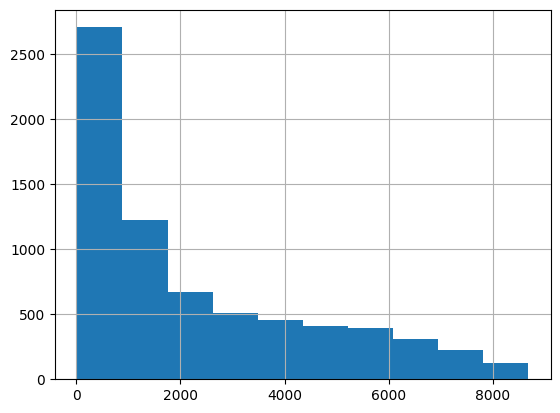

In [19]:
df.TotalCharges.hist()

In [20]:
# because the distribution is not normal, fill null missing values with the median
df.fillna(df.TotalCharges.median(),inplace=True)

#### Preprocess categorical columns

In [21]:
# convert categorical columns to 0 and 1:

df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

df[['SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling','Churn']] = df[['SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling','Churn']].replace({'Yes': 1, 'No': 0})

# get dummies

df = pd.get_dummies(df, columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'], dtype='int')

In [22]:
# drop redundent columns
df['No internet service'] = df['OnlineSecurity_No internet service']
df = df[df.columns.drop(list(df.filter(regex='_No internet service')))]

#### Preprocess numerical columns

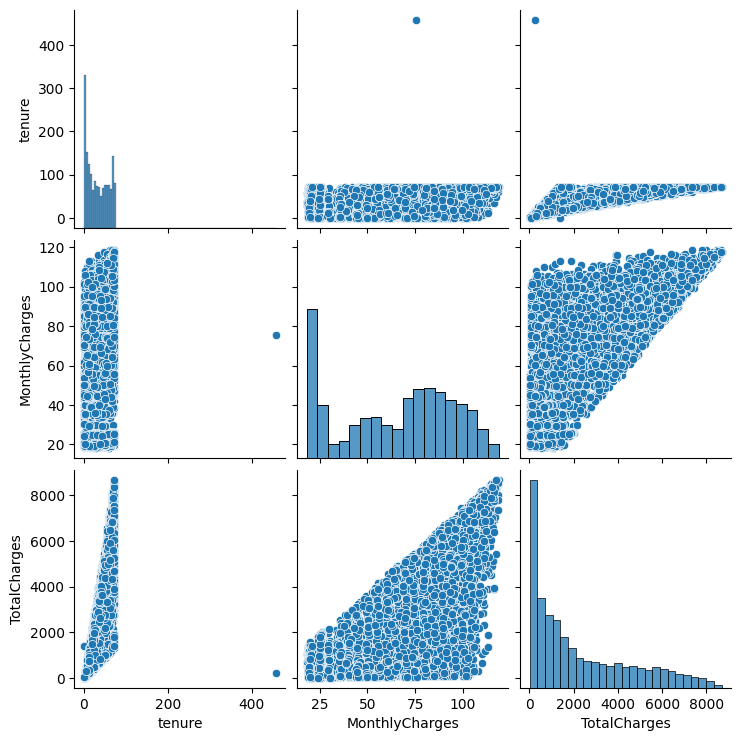

In [23]:
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges']])

In [24]:
# drop outlier in 'tenure' column
df[df.tenure > 400].index

Index([65], dtype='int64')

In [25]:
df = df.drop(df.index[65])

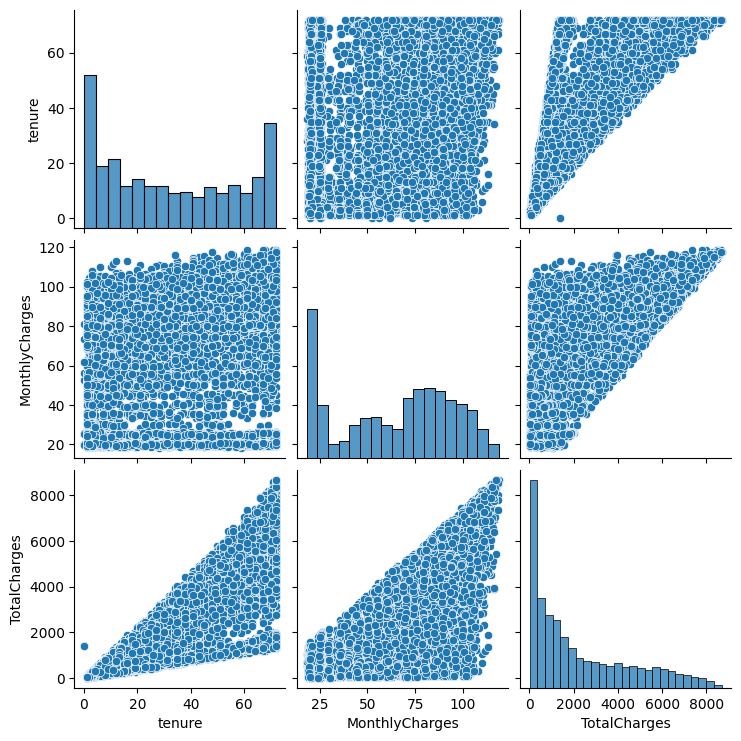

In [26]:
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges']])

In [27]:
# handle outliers where 'tenure' = 0 and 'TotalCharges' > 0
df[(df.tenure==0) & (df.TotalCharges > 0)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,No internet service
488,0,0,1,1,0,0,1,52.55,1397.475,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0
753,1,0,0,1,0,1,0,20.25,1397.475,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
936,0,0,1,1,0,1,0,80.85,1397.475,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0
1082,1,0,1,1,0,1,0,25.75,1397.475,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1340,0,0,1,1,0,0,0,56.05,1397.475,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0
3331,1,0,1,1,0,1,0,19.85,1397.475,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3826,1,0,1,1,0,1,0,25.35,1397.475,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4380,0,0,1,1,0,1,0,20.00,1397.475,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
5218,1,0,1,1,0,1,1,19.70,1397.475,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
6670,0,0,1,1,0,1,0,73.35,1397.475,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0


In [28]:
df[(df.tenure==0) & (df.TotalCharges > 0)].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [29]:
df = df.drop(df[(df.tenure==0) & (df.TotalCharges > 0)].index)

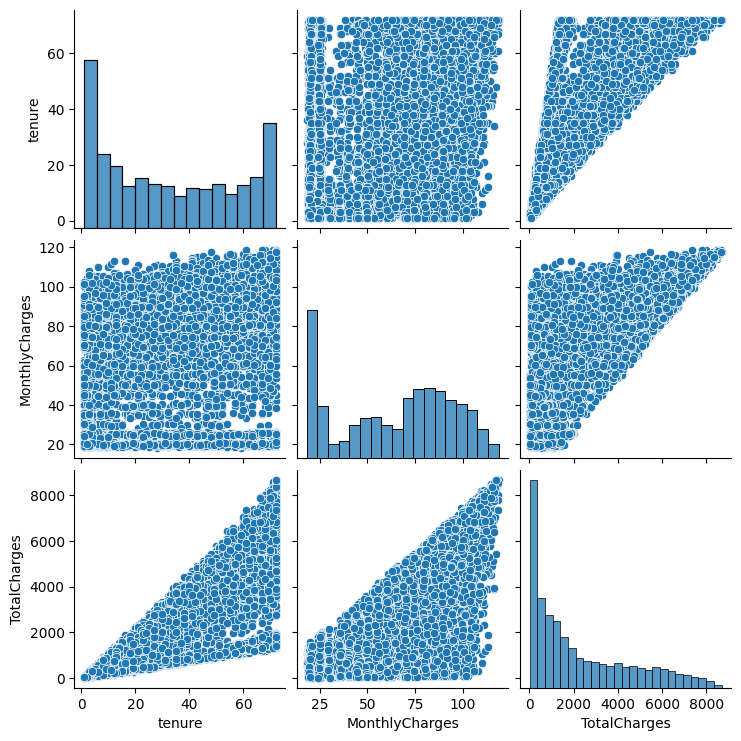

In [30]:
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges']])

#### Check for correlation

In [31]:
# visualize correlation
df[['tenure','MonthlyCharges','TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246949,0.825859
MonthlyCharges,0.246949,1.000000,0.651153
TotalCharges,0.825859,0.651153,1.000000


## Train Model

In [32]:
X = df.drop('Churn',axis=1)
y = df.Churn

### Handle imbalanced data

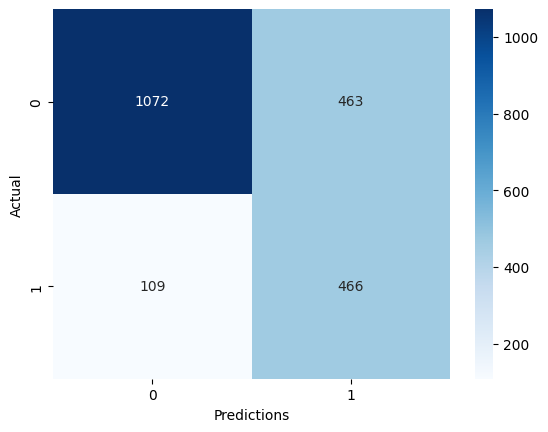

Accuracy: 0.73
Recall: 0.81


In [33]:
# Undersample

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)


model = LogisticRegression(random_state=32)
model.fit(X_train,y_train)

preds = model.predict(X_test)

cm = confusion_matrix(y_test,preds)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()

print('Accuracy:',round(accuracy_score(y_test,preds),2))
print('Recall:',round(recall_score(y_test, preds),2))

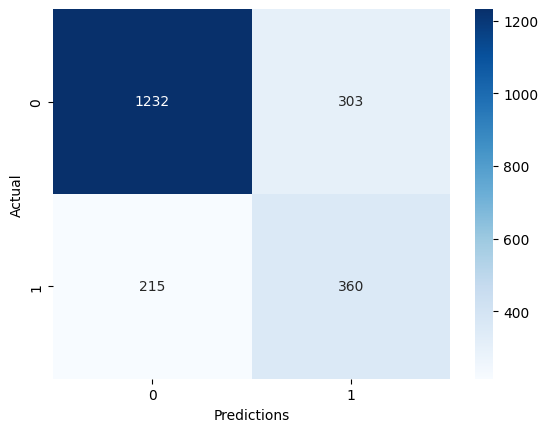

Accuracy: 0.75
Recall: 0.63


In [34]:
# Overrsample

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

rus = SMOTE(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

model = LogisticRegression(random_state=32)
model.fit(X_train,y_train)

preds = model.predict(X_test)

cm = confusion_matrix(y_test,preds)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()

print('Accuracy:',round(accuracy_score(y_test,preds),2))
print('Recall:',round(recall_score(y_test, preds),2))

## Optimize model

### Feature Selection

In [35]:
# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = ['tenure','MonthlyCharges','TotalCharges']
vif_data["VIF"] = [variance_inflation_factor(X_train[['tenure','MonthlyCharges','TotalCharges']].values, i) for i in range(X_train[['tenure','MonthlyCharges','TotalCharges']].shape[1])]

# Display VIF values
print(vif_data.sort_values('VIF',ascending=False))

          Feature       VIF
2    TotalCharges  8.226012
0          tenure  6.960578
1  MonthlyCharges  2.745018


In [36]:
best_num_cols = list(vif_data['Feature'].values)

In [37]:
# Feature selection - Categorical

chi_selector = SelectKBest(score_func=chi2, k='all')  # Select all to see scores

cat_columns = X_train.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
chi_selector.fit(cat_columns, y_train)

chi_scores = pd.DataFrame({'Feature': cat_columns.columns, 'Chi2 Score': chi_selector.scores_,'p-values':chi_selector.pvalues_})
print('Number of Features:',chi_scores.shape[0])
chi_scores = chi_scores[chi_scores['p-values'] < 0.05]
print('Statistically Significant Features:',chi_scores.shape[0])
chi_scores = chi_scores.sort_values(by='Chi2 Score', ascending=False)
chi_scores.reset_index(inplace=True,drop=True)

Number of Features: 32
Statistically Significant Features: 30


In [38]:
best_cat_cols = list(chi_scores['Feature'].values)
#best_cat_cols = list(chi_scores['Feature'][chi_scores['Chi2 Score'] > 100].values)

In [39]:
best_cols = best_num_cols + best_cat_cols

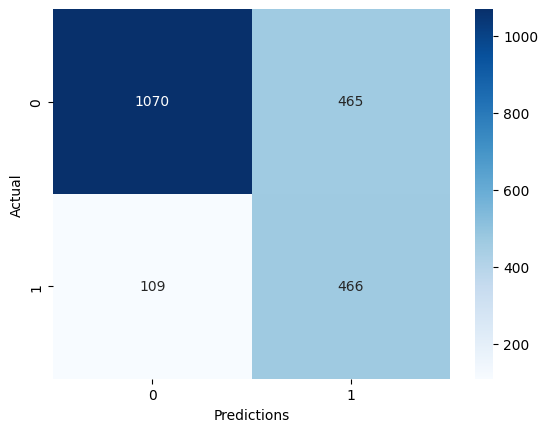

Accuracy: 0.73
Recall: 0.81


In [40]:
# Retrain model

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

model = LogisticRegression(random_state=32)
model.fit(X_train[best_cols],y_train)

preds = model.predict(X_test[best_cols])

cm = confusion_matrix(y_test,preds)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()

print('Accuracy:',round(accuracy_score(y_test,preds),2))
print('Recall:',round(recall_score(y_test, preds),2))

### Hyperparameter Optimization

In [41]:
# Logistic Regression

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 500]
}

model = LogisticRegression(random_state=32)

grid_search = GridSearchCV(model, param_grid, cv=5, verbose=0, scoring = 'recall')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Best Parameters: {'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8160964951662624


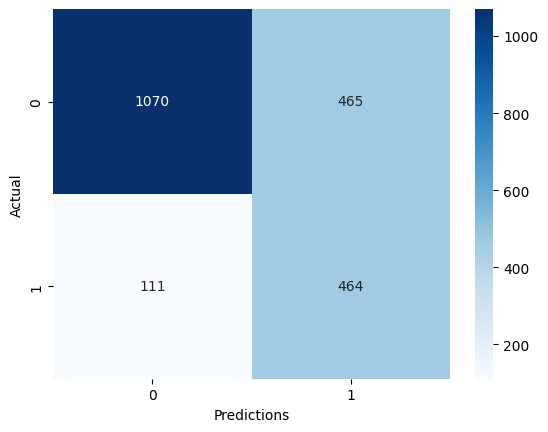

Accuracy: 0.73
Recall: 0.81


In [42]:
# Retrain model

model = LogisticRegression(max_iter = 100, penalty = 'l1', solver = 'liblinear', random_state = 32)
model.fit(X_train,y_train)

preds = model.predict(X_test)

cm = confusion_matrix(y_test,preds)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()

print('Accuracy:',round(accuracy_score(y_test,preds),2))
print('Recall:',round(recall_score(y_test, preds),2))

### Try different models

In [43]:
param_grid = {
    'n_estimators': [25,50, 100, 200],  
    'max_depth': [1, 3, 5,10],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestClassifier(random_state=32)

grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, scoring = 'recall')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8361826943222292


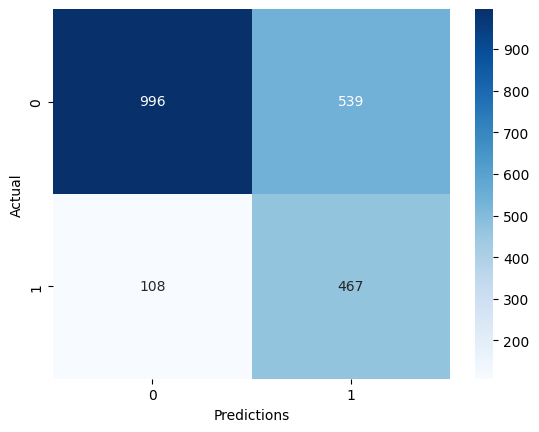

Accuracy: 0.69
Recall: 0.81


In [44]:
# Retrain model

model = RandomForestClassifier(max_depth = 3,min_samples_split = 2,n_estimators = 50,random_state = 32)
model.fit(X_train,y_train)

preds = model.predict(X_test)

cm = confusion_matrix(y_test,preds)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()

print('Accuracy:',round(accuracy_score(y_test,preds),2))
print('Recall:',round(recall_score(y_test, preds),2))

In [45]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001,0.01, 0.1],
    'max_depth': [1, 3, 5]
}

model = xgb.XGBClassifier(random_state=32)

grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, scoring = 'recall')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100}
Best Score: 0.893352488701326


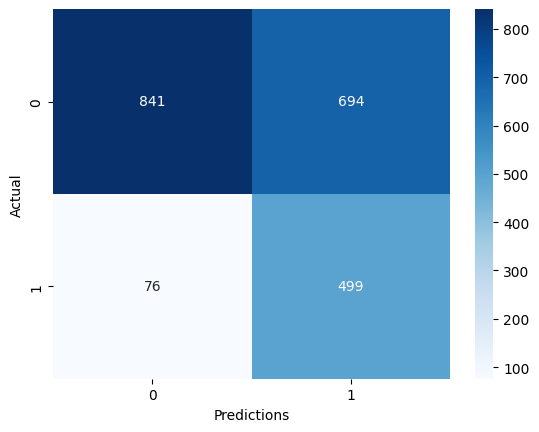

Accuracy: 0.64
Recall: 0.87


In [46]:
# Retrain model

model = xgb.XGBClassifier(learning_rate = 0.001, max_depth = 1, n_estimators = 100, random_state = 32)
model.fit(X_train,y_train)

preds = model.predict(X_test)

cm = confusion_matrix(y_test,preds)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()

print('Accuracy:',round(accuracy_score(y_test,preds),2))
print('Recall:',round(recall_score(y_test, preds),2))